Part ONE:

In [6]:
# semeion data is downloaned, named as "semeion.data.txt", and put in the following path relative to the current working dir
import pandas as pd
dataset = pd.read_table('../data/semeion.data.txt',sep='\s+',header=None)
X,Y = dataset[list(range(256))],dataset[list(range(256,266))] # Seperate features and labels

In [169]:
X.shape,Y.shape

((1593, 256), (1593, 10))

In [136]:
x = X.values.reshape(X.shape[0],16,16)
y = Y.values

In [137]:
import matplotlib.pyplot as plt

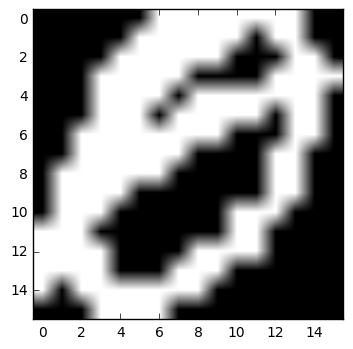

In [138]:
plt.imshow(x[0],cmap='gray');plt.show()

In [139]:
y[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

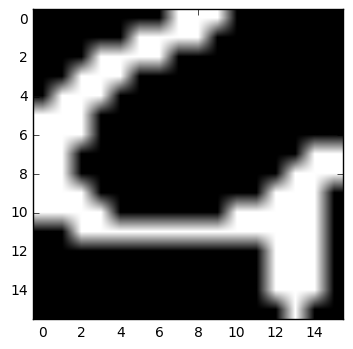

In [140]:
plt.imshow(x[93],cmap='gray');plt.show()

In [141]:
x[0]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
         1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
         1.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0

In [142]:
x[0].shape

(16, 16)

In [143]:
# Generate an example /w stride = 2, padding = 3, kernel size = 6
import numpy as np

In [224]:
def conv2(phi, K,
          #padding = 5, # test
          #padding = 10, # SAME
          padding = 0, # VALID
          stride=2
         ):
    size = phi.shape[0] # Assume X is a square
    kernel_size = K.shape[0]
    # Key formula
    out_size = (size+2*padding-kernel_size)/stride+1
    out_size = int(out_size)
    #print('Output size:',out_size)
    padded_x = np.zeros([size+2*padding,size+2*padding])
    padded_x[padding:(padding+size),padding:(padding+size)] = phi
    psi = np.zeros([out_size,out_size])
    for i in range(out_size):
        for j in range(out_size):
            x0,y0=i*stride,j*stride
            #print(x0,y0)
            # Compute the convolution for output at [i,j]
            for a in range(kernel_size):
                for b in range(kernel_size):
                    psi[i,j] += K[a,b]*padded_x[x0+a,y0+b]
    return psi

In [157]:
K_SIZE = 4
Sample_id =299
yhat=conv2(x[Sample_id],np.ones([K_SIZE,K_SIZE]),padding=0)

Output size: 7


In [158]:
y[Sample_id]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [159]:
yhat

array([[  9.,   9.,   8.,   8.,   7.,   5.,   4.],
       [ 13.,   9.,   8.,   6.,   4.,   2.,   0.],
       [  7.,   7.,   8.,   7.,   9.,   6.,   0.],
       [  0.,   0.,   0.,   1.,   9.,   8.,   0.],
       [  0.,   0.,   0.,   3.,  10.,   7.,   0.],
       [  2.,   4.,   5.,   9.,   9.,   3.,   0.],
       [  6.,  10.,   7.,   6.,   3.,   0.,   0.]])

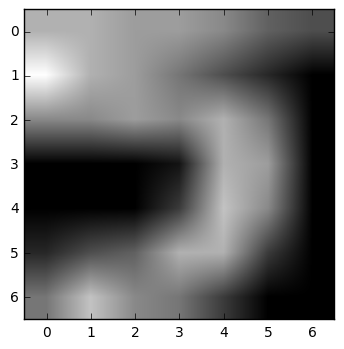

In [160]:
plt.imshow(yhat,cmap='gray');plt.show()

In [ ]:
# A simply convolutional neural network
#1*16*16 => 3*7*7 by using zero padding, 4*4 kernel, and stride 2
shuffled_indice = np.random.choice(x.shape[0], size=100000, replace=True)
x=x[shuffled_indice]
y=y[shuffled_indice]
num_channel = 3
K = np.random.random([num_channel,K_SIZE,K_SIZE])
H_SIZE = 7
h = np.zeros([num_channel,H_SIZE,H_SIZE])
W = np.random.normal(0,.01,size=[10,num_channel,H_SIZE,H_SIZE])
b = np.zeros(10)
s = 2
grad_W = np.zeros(W.shape)
grad_b = np.zeros(b.shape)
grad_K = np.zeros(K.shape)
lr = .1
X_ = np.zeros([7,7,4,4])
for id in range(x.shape[0]):
    x_ = x[id]
    y_ = y[id]
    for ch in range(num_channel):
        h[ch] = conv2(x_,K[ch])
    h = 1/(1+np.exp(-h))
    logits = np.tensordot(h,W,axes=([0,1,2],[1,2,3])) + b
    p = np.exp(logits) / np.exp(logits).sum()
    cross_entropy = -(y_*np.log(p)).sum()/math.log(10) # aka normalized log likelihood, Kullback-Lebler divergent
    print(id,cross_entropy)
    grad_W = - np.tensordot((y_ - p).reshape(10,1), h.reshape(1,3,7,7),  axes=([1],[0]))  /math.log(10)
    grad_b = - np.tensordot((y_ - p).reshape(10,1), np.ones([1]),  axes=([1],[0]))  /math.log(10)    #    
    for i in range(7):
        for j in range(7):
            for l in range(4):
                for m in range(4):
                    X_[i,j,l,m] = x_[s*i+l,s*j+m]
    grad_K = - np.tensordot(np.tensordot((y_ - p), W,  axes=([0],[0])) * h * (1-h), X_,axes=([1,2],[0,1]))  /math.log(10)
    W += -grad_W * lr
    b += -grad_b * lr
    K += -grad_K * lr
#

0 0.991889944876
1 1.92506668139
2 2.10067043244
3 2.07370509353
4 2.04151155401
5 1.77638467346
6 1.83833713035
7 1.30778825569
8 1.77538921453
9 1.77494353944
10 2.42011109636
11 2.24317013887
12 0.0540271517234
13 2.17779822747
14 1.9780230814
15 1.82705481969
16 1.96934525976
17 1.72418586061
18 1.98281993572
19 1.5161274231
20 1.61181571606
21 0.0145152340622
22 2.06717472593
23 2.04094585757
24 0.0135934935821
25 2.32865414503
26 0.0542673220254
27 2.27862851327
28 2.13318565768
29 1.26360324069
30 2.2440301564
31 0.17271190294
32 1.95343915361
33 1.77894429402
34 1.69751043635
35 1.63218692185
36 2.006337856
37 0.0531419168997
38 2.18409198844
39 1.91430622513
40 1.45430401773
41 2.19673525115
42 1.61315627564
43 0.0395028150193
44 1.93266658191
45 2.14781954478
46 1.79067995558
47 1.36743778398
48 0.0641321650093
49 0.0200776562446
50 1.99856596162
51 1.39285196176
52 1.89394219434
53 1.81982733385
54 1.8139546913
55 1.76567440816
56 0.0348817147924
57 1.90753735247
58 1.657135